In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas_datareader as data 

In [2]:
start = '2010-01-01'
end = '2022-7-1'


df = data.DataReader('AAPL','yahoo',start ,end )
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242400.0,139.229996
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.720001
2022-07-01,139.039993,135.660004,136.039993,138.929993,71007500.0,138.929993


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [5]:
df = df.drop(['Date', 'Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


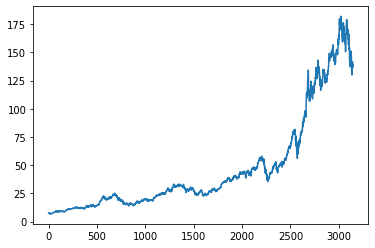

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3142,143.490005,140.970001,142.699997,141.660004,70207900.0
3143,143.419998,137.320007,142.130005,137.440002,67083400.0
3144,140.669998,136.669998,137.460007,139.229996,66242400.0
3145,138.369995,133.770004,137.250000,136.720001,98964500.0


In [8]:
ma100 = df.Close.rolling(100).mean()

In [9]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3142    158.301401
3143    157.917401
3144    157.580701
3145    157.224001
3146    156.896701
Name: Close, Length: 3147, dtype: float64

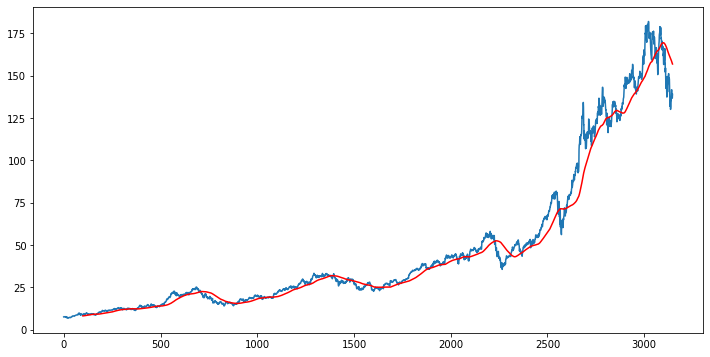

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3142    158.52225
3143    158.46460
3144    158.41300
3145    158.35600
3146    158.30550
Name: Close, Length: 3147, dtype: float64

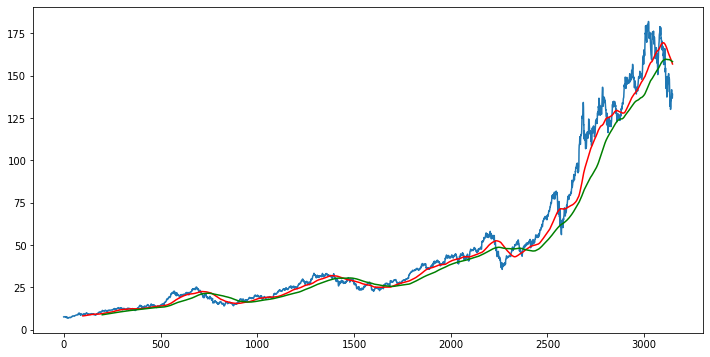

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(3147, 5)

In [14]:
# spliting data into trading and testing 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(2202, 1)
(945, 1)


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
data_testing.head()

,Close
2202,56.814999
2203,57.320000
2204,58.017502
2205,56.997501
2206,56.072498


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data.training_array = scaler.fit_transform(data_training)
data.training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.96048261],
       [0.98302841],
       [0.98696029]])

In [19]:
x_train =[]
y_train =[]

for i in range (100,data.training_array.shape[0]):
    x_train.append(data.training_array[i-100:i])
    y_train.append(data.training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
    

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences = True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu',return_sequences = True,))
              
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu',return_sequences = True,))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer= 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
66/66 [==============================] - 34s 365ms/step - loss: 0.0303
Epoch 2/50
66/66 [==============================] - 24s 365ms/step - loss: 0.0067
Epoch 3/50
66/66 [==============================] - 24s 362ms/step - loss: 0.0052
Epoch 4/50
66/66 [==============================] - 23s 355ms/step - loss: 0.0053
Epoch 5/50
66/66 [==============================] - 23s 355ms/step - loss: 0.0041
Epoch 6/50
66/66 [==============================] - 24s 363ms/step - loss: 0.0047
Epoch 7/50
66/66 [==============================] - 23s 345ms/step - loss: 0.0042
Epoch 8/50
66/66 [==============================] - 23s 348ms/step - loss: 0.0044
Epoch 9/50
66/66 [==============================] - 24s 361ms/step - loss: 0.0037
Epoch 10/50
66/66 [==============================] - 23s 342ms/step - loss: 0.0038
Epoch 11/50
66/66 [==============================] - 16s 247ms/step - loss: 0.0033
Epoch 12/50
66/66 [==============================] - 13s 200ms/step - loss: 0.0034
Epoch 13/50
6

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
2202,56.814999
2203,57.320000
2204,58.017502
2205,56.997501
2206,56.072498


In [26]:
data_training.tail(100)

,Close
2102,46.840000
2103,47.509998
2104,47.147499
2105,47.037498
2106,46.610001
...,...
2197,55.197498
2198,55.547501
2199,55.105000
2200,56.237499


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Gagan Soni\AppData\Local\Temp\ipykernel_10252\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [29]:
final_df.head()

,Close
0,46.840000
1,47.509998
2,47.147499
3,47.037498
4,46.610001


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07710165],
       [0.08167618],
       [0.07920115],
       ...,
       [0.70791158],
       [0.69077412],
       [0.70586325]])

In [31]:
input_data.shape

(1045, 1)

In [32]:

x_test = []
y_test = []


for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [34]:
y_predicted = model.predict(x_test)

30/30 [==============================] - 3s 87ms/step


In [35]:
y_test

array([0.14520781, 0.1486558 , 0.15341813, 0.14645388, 0.14013825,
       0.13925067, 0.14454211, 0.12660237, 0.12334215, 0.13641717,
       0.1283093 , 0.13648544, 0.13484681, 0.12602203, 0.13163779,
       0.13392506, 0.13747546, 0.12443458, 0.13247419, 0.12649996,
       0.11956987, 0.1213792 , 0.13086968, 0.13660494, 0.1114449 ,
       0.10139113, 0.10511224, 0.115661  , 0.11316891, 0.10630708,
       0.08872578, 0.08541435, 0.07614578, 0.08401469, 0.08763335,
       0.07454126, 0.05938379, 0.05904241, 0.05137833, 0.05535546,
       0.05470684, 0.06614321, 0.06377059, 0.06211488, 0.07276608,
       0.0588888 , 0.05552616, 0.04489204, 0.04678673, 0.04513101,
       0.04593327, 0.04909106, 0.03975419, 0.03712555, 0.0407613 ,
       0.03191943, 0.02498933, 0.0145771 , 0.00792012, 0.02556968,
       0.02382861, 0.02396517, 0.02654264, 0.02684987, 0.        ,
       0.010361  , 0.00979771, 0.01461125, 0.01898096, 0.01981736,
       0.01723989, 0.01333105, 0.01857132, 0.02176325, 0.02333

In [36]:
y_predicted

array([[0.13377959],
       [0.13387623],
       [0.13398618],
       [0.13413118],
       [0.13432482],
       [0.13456853],
       [0.13485447],
       [0.13517244],
       [0.13550217],
       [0.13581696],
       [0.13609584],
       [0.13632008],
       [0.13648005],
       [0.1365733 ],
       [0.13659734],
       [0.13655424],
       [0.13645181],
       [0.13630366],
       [0.13611785],
       [0.13590342],
       [0.13566616],
       [0.13540514],
       [0.13511696],
       [0.13480455],
       [0.13447914],
       [0.13414082],
       [0.1337779 ],
       [0.13337472],
       [0.13292195],
       [0.13241547],
       [0.13185191],
       [0.13122179],
       [0.13051249],
       [0.12970921],
       [0.12880105],
       [0.12778455],
       [0.1266573 ],
       [0.12541404],
       [0.12404977],
       [0.12255934],
       [0.12094122],
       [0.11919829],
       [0.11734577],
       [0.11540711],
       [0.11341012],
       [0.11139314],
       [0.10938844],
       [0.107

In [37]:
scaler.scale_

array([0.00682769])

In [38]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

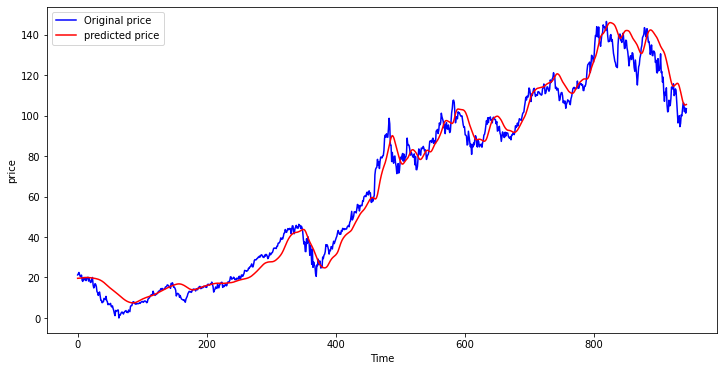

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original price')
plt.plot(y_predicted,'r',label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()